In [12]:
# Make sure you run this cell!
import keras
import numpy as np
np.random.seed(0)

<center><h1>Understanding Activation Functions</h1></center>

**Goal:** Understand the different activation functions and their common uses. 

In this tutorial, you will examine the different activation functions common in Deep Learning, and gain some intuition for how and when to use each.  
<br>
<br>
<br>

<center><h3>Part 1: What is a Neuron Computing?</h3></center>

Recall the architecture of a typical neural network.  The network is is made out of layers of neurons.  Each neuron in layer **_L_** takes in all the outputs from the previous layer (**_L - 1_**), computes an ouput, and passes that along to every neuron in the next layer (**_L + 1_**). Recall that when we talk about the layers of a neural network, we typically aren't talking about the _input layer_, only the **_hidden layer(s)_** and **_output layer_**.  Take a look at the following diagram for a refresher.  Each circle represents a neuron, and each line represents a weight.  


<img src='http://www.astroml.org/_images/fig_neural_network_1.png' height=50% width=50%>

But what happens _inside_ each neuron?  Each neuron computes their **_Z_** value, and feeds it through the an **_Activation Function._**  Let's take a look at at a diagram and see how we can gain some intuition for this process.
<br>
<br>
<img src='http://3.bp.blogspot.com/-7RWgohC4pYE/VhtQ8IELsLI/AAAAAAAAA6I/_XFhMbjpcCY/s1600/Simple%2BNeural%2BNetwork.png' height=40% width=40%>

Don't let all the mathematical notation in this diagram scare you, it's actually pretty simple! Let's work through it piece by piece before we compute some examples by hand.  



Another way to represent the equation shown in the large neuron is **Z = w<sup>T</sup>x + b**.  **Z** is then fed through an **_Activation Function_**, to compute the output that will be propagated to the next layer.  

Let's define each variable in this equation to make it easier to understand:

**_w:_** A vector containing every weight value from every neuron from the previous layer. These weights start off as random values, but will shift towards optimal values during the training phase through backpropagation.  
<br>
**_<sup>T</sup>:_** Mathematical notation for "_Transpose_", which means "flip the matrix over its diagonal". In this case, it takes our 1-dimensional weight vector and rotates it so that we can easily compute the dot product of our weight vector and X, our inputs.  For example, a 4 x 1 vector would become a 1 x 4 vector.  
<br>
**_x:_** A vector containing all the outputs from the previous layer. The positions of each value in this vector match up with the position of the corresponding weight in the weight vector.  For instance, _w<sub>1</sub>_ and _X<sub>1</sub>_ are the values for the weight and output value from the 1st neuron of the previous layer.  

**_b:_** A bias added to the equation to shift the decision boundary away from the origin. Recall that this value is set to a random value at initialization, and each neuron will learn the best bias along with the weights through backpropagation during the training phase. 

<center><h3>Test Your Understanding</h3></center>

Try testing your understanding by manually computing z for the following neurons.  

**_Hint:_** No need to do this manually--we need to compute the sum of inputs multiplied by their corresponding weights, plus the bias value.  This is the same as computing the **_dot product_** of w and x, and then adding b.  To compute the dot product of two vectors, just use numpy's [numpy.dot function](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.dot.html). An example is provided as a comment below.  


In [13]:
# Problem 1: 
w1 = [-0.4, 0.82, 1.0, 0.5, 0.23, -0.75]
x1 = [2, 3, 3, 7, 1, 4]
b1 = 1.43

#(SAMPLE SOLUTION: PROBLEM 1)
z1 = np.dot(w1, x1)
z1 += b1
print("z1:  {}".format(z1))

#Problem 2:
w2 = [-0.43, -2.1, 0.3, 0.25, -1.1, -0.43]
x2 = [0.22, 0.34, 1.2, 0.00038, .63, -0.22]
b2 = -3.4

z2 = np.dot(w2, 2)
z2 += b2
print("z2:  {}".format(z2))

#Problem 3:
w3 = [-0.00014, -.31105, 0.3, 0.000256, -.1145, -0.0000009]
x3 = [0.22, 0.34, 1.2, 0.00038, .63, -0.22]
b3 = 0.0016

z3 = np.dot(w3, x3)
z3 += b3
print("z3:  {}".format(z3))

z1:  6.82
z2:  [-4.26 -7.6  -2.8  -2.9  -5.6  -4.26]
z3:  0.18367749528


**Expected Output**
<br>
z1: 6.819999999999999
<br>
z2:-4.446905
<br>
z3 0.18367749528

<center><h2> What is an Activation Function?</h2></center>

Our neuron has now taken all weights and inputs, reduced them down to a single value, and added our bias.  What do we do with this number now?

We feed through an **_Activation Function_**, which will determine what message the neuron passes on to the next layer.  In order to understand this, it's helpful to remember the inspiration behind neural networks--neurons in a brain!

<img src='https://i.giphy.com/media/FLw63FKxHyVHO/giphy.webp'>

A neural network is a _symbolic representation_ of the structure and function of neurons in a brain.  This means that although the details may be different, the general purpose and structure are the same--neural networks are a symbolic representation of neurons in a brain in the same way that airplanes are a symbolic representation of birds.

In a brain, a neuron takes in the inputs from other neurons (through the dendrites on the left side of the picture) , and if the combination of those inputs are enough, it "fires" by passing an electrical charge down through the axon to any other connected neurons.  A neuron either fires or doesnt fire--on or off.  There is no "in between" state.  In this way, the neurons of our neural network are different--depending on the **_activation function_** used, our neurons do not have this limitation.  

In simpler versions such as Single-Layer Perceptrons, the activation function is a simple step function. If the value of Z is greater than 1, the perceptron fires, passing a value of 1.  Otherwise, it does not fire, passing along a value of 0.  This may work for perceptrons, but for Deep Neural Networks, it leaves a lot to be desired. We'll skip over the step activation function and move right onto the activation functions most commonly used in Deep Learning: **_Sigmoid, Tanh, reLU,_** and **_Softmax_**

From here on out, we'll code up examples of every activation function from scratch to get an intuition for how each one works.  We'll also explore the best use cases for each by looking at an examples of each in real neural networks!

In [14]:
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

In [15]:
# Preprocessing our training and testing sets, don't worry if you don't 
# Understand this part--we'll cover this in depth in other tutorials!
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')
X_train /= 255.
X_test /= 255.
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

<center><h2>Sigmoid</h2></center>

The **_sigmoid_** maps all possible real number inputs from negative infinity to infinity to a value between 0 and 1.  The function is called a sigmoid because when graphed, it resembles an 'S'.  If you're familiar with logistic regression, you'll likely recognize this function.    

<center><img src='https://ipfs.io/ipfs/QmXoypizjW3WknFiJnKLwHCnL72vedxjQkDDP1mXWo6uco/I/m/Logistic-curve.svg.png'></center>

The equation for the sigmoid function is: 

<center><img src='http://file.scirp.org/Html/htmlimages/10-9402081x/34ca7298-136f-4b25-a192-1e7f24401b53.png'></center>

In this case, **x** will be equal to Z, which is equal to the dot product of our weights and inputs, plus the bias value. 

**_Challenge:_** Complete the function below so that it returns the logistic sigmoid of the input.  (Hint: make use of numpy's [numpy.exp() function!](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.exp.html))

In [16]:
def sigmoid(x):
    s = None
    return s

print('test 1: {}    Expected output: {}'.format(sigmoid(1.5),  0.817574476))
print('test 2: {}    Expected output: {}'.format(sigmoid(-0.2), 0.450166002))
print('test 3: {}    Expected output: {}'.format(sigmoid(6.7),  0.998770601))

test 1: None    Expected output: 0.817574476
test 2: None    Expected output: 0.450166002
test 3: None    Expected output: 0.998770601


<center><h3>Use Cases: Sigmoid</h3></center>

A sigmoid function can be used as a common activation function for any typical layer in a neural network.  This is a simple but effective way to introduce non-linearity into our model.  Although there are other activation functions that have become more popular in Deep Learning as of late, it is still very common to see sigmoids as the activation function for the output layer in binary classifiers.  This makes intuitive sense, since the _output of a sigmoid can be easily interpreted as a percentage value between 0 and 100%_!

<center><h3>Example Use: Sigmoid</h3></center>

In this example, we'll build an image classifier using the popular MNIST data set.  During this step, we'll use sigmoid activation functions in every layer except for the last one, which will be a softmax (there are 10 possible classes, so a sigmoid activation function would not make sense here.)

In [17]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 44us/step - loss: 2.2934 - acc: 0.1372 - val_loss: 2.2595 - val_acc: 0.1492
Epoch 2/10
60000/60000 [==============================] - 2s 36us/step - loss: 2.2378 - acc: 0.2900 - val_loss: 2.2106 - val_acc: 0.2920
Epoch 3/10
60000/60000 [==============================] - 2s 37us/step - loss: 2.1822 - acc: 0.4041 - val_loss: 2.1437 - val_acc: 0.4873
Epoch 4/10
60000/60000 [==============================] - 2s 35us/step - loss: 2.1028 - acc: 0.4948 - val_loss: 2.0470 - val_acc: 0.4927
Epoch 5/10
60000/60000 [==============================] - 2s 34us/step - loss: 1.9891 - acc: 0.5232 - val_loss: 1.9117 - val_acc: 0.5383
Epoch 6/10
60000/60000 [==============================] - 2s 34us/step - loss: 1.8411 - acc: 0.5577 - val_loss: 1.7496 - val_acc: 0.5694
Epoch 7/10
60000/60000 [==============================] - 2s 35us/step - loss: 1.6774 - acc: 0.5916 - val_loss: 1.5856 - val_acc

<center><h3>Takeaways: Sigmoid Activation Functions</h3></center>

After 10 epochs of training on the MNIST data set, we were able to obtain an **accuracy of 70%** on our validation set--not bad!  There's still room for improvement here.  This shows us that sigmoid activation functions do a passable job at capturing nonlinearity presented in the model.  Let's hold on to that 70% number and see how it stacks up against other activation functions!

<center><h2>Tanh</h2></center>

Tanh (pronounched "tanch") stands for  _Hyperbolic Tangent_.  When plotted, the tanh function looks very similar to the sigmoid activation function.  This is because tanh is just a rescaled logistic sigmoid function! The main difference between the two is whereas the sigmoid activation function is bounded at 0 and 1, the tanh activation function is bounded at -1 and 1.  Let's take a look at a graph of the tanh function:

<img src='http://mathworld.wolfram.com/images/interactive/TanhReal.gif'>





Take a look at the plot below to see how tanh compares to the sigmoid function. The red line is a plot of the <font color='red'>tanh function</font>, and the blue line is the <font color='blue'>sigmoid function</font>. 

<img src='http://brenocon.com/blog/wp-content/uploads/2013/10/Screen-Shot-2013-10-31-at-4.32.04-PM.png' height=50% width=50%>


We won't worry about writing a function to manually calculate the tanh function, but for reference, here it is:

<center><img src='img/tanh_equation.png'></center>

<center><h3>Use Cases: Tanh</h3></center>
The tanh function is generally superior to the sigmoid function for training neural networks.  There are two main reasons for this:

1.  Stronger gradients, which allow for more efficient back propagation.  
2.  (Normalized) Data will be centered around 0 with a tanh activation function.  This is important, since the output of this layer will be the input of the next layer.  This helps prevent internal covariate shift--where each successive layer starts slightly biasing in a continuing direction (for intuition on this, take a look at what 0 outputs on a sigmoid function, and then use that as your input.  How did it change?)

If you're interested in really digging into the reasons why tanh is a better choice than a sigmoid function, check out Yann LeCunn's excellent paper on <a href='http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf'>Efficient Backprop</a>.

In [18]:
tanh_model = Sequential()
tanh_model.add(Dense((64), activation='tanh', input_shape=(784,)))
tanh_model.add(Dense((64), activation='tanh'))
tanh_model.add(Dense((10), activation='softmax'))
tanh_model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])
tanh_model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 40us/step - loss: 1.1402 - acc: 0.7311 - val_loss: 0.6608 - val_acc: 0.8552
Epoch 2/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.5636 - acc: 0.8658 - val_loss: 0.4646 - val_acc: 0.8855
Epoch 3/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.4417 - acc: 0.8852 - val_loss: 0.3919 - val_acc: 0.8972
Epoch 4/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.3864 - acc: 0.8954 - val_loss: 0.3515 - val_acc: 0.9043
Epoch 5/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.3537 - acc: 0.9026 - val_loss: 0.3259 - val_acc: 0.9107
Epoch 6/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.3310 - acc: 0.9073 - val_loss: 0.3094 - val_acc: 0.9148
Epoch 7/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.3138 - acc: 0.9114 - val_loss: 0.2947 - val_acc

<center><h2>reLU/Leaky reLU</h2></center>

ReLU is short for **_Rectified Linear Unit_**.  For tasks such as computer vision, the discovery of the reLU activation function was revolutionary. Although it's highly effective, it's also easy to understand--reLU works by returning 0 for any for any z-values less than 0, and the value for anything greater than or equal to 0.  When graphed, reLU looks like this:

<center><img src='img/relu.png'></center>

There's also another popular variant of this activation function, called **_Leaky ReLU_**.  For inputs greater than or equal to zero, leaky reLU and classic reLU act the same way.  However, for negative inputs, leaky relu instead multiplies these inputs by a very small scalar value (0.1 seems to be most common) and outputs the result.  In this way, leaky reLU lets some of the signal from negative inputs "leak" through.  Some researchers report that using _leaky ReLU_ helps them avoid a the **_vanishing/exploding gradient problem_**--we won't dive into that problem in this assignment, but if you'd like to read more about it, check out the [wikipedia article on vanishing gradient](https://en.wikipedia.org/wiki/Vanishing_gradient_problem)!

<center><img src='img/leaky_relu.png'></center>


Let's build a model that makes use of the reLU activation function and see how it compares to Sigmoid and Tanh.

In [19]:
relu_model = Sequential()
relu_model.add(Dense((64), activation='relu', input_shape=(784,)))
relu_model.add(Dense((64), activation='relu'))
relu_model.add(Dense((10), activation='softmax'))
relu_model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])
relu_model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 39us/step - loss: 1.3803 - acc: 0.6478 - val_loss: 0.6532 - val_acc: 0.8470
Epoch 2/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.5310 - acc: 0.8626 - val_loss: 0.4214 - val_acc: 0.8873
Epoch 3/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.4043 - acc: 0.8891 - val_loss: 0.3553 - val_acc: 0.9005
Epoch 4/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.3549 - acc: 0.9003 - val_loss: 0.3193 - val_acc: 0.9085
Epoch 5/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.3254 - acc: 0.9078 - val_loss: 0.2987 - val_acc: 0.9151
Epoch 6/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.3045 - acc: 0.9143 - val_loss: 0.2829 - val_acc: 0.9210
Epoch 7/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.2884 - acc: 0.9186 - val_loss: 0.2696 - val_acc

<center><h2>Takeaways: ReLU</h2></center>

As we can see from our example above, reLU is a really great choice as an activation function.  This is especially true for problems, such as MNIST. When we cover Convolutional Neural Networks later in the course, we'll see that reLU plays a pivotal role.  

<center><h2>SoftMax</h2></center>

The final activation function we'll look at in this lesson is a special one--the **_SoftMax_** activation function.  This function is special in that it is primarily only ever used for the output layer in a neural network.  Much like the sigmoid activation function, SoftMax outputs probabilities between 0 and 1.  Recall that we use sigmoid for _binary classification_ problems--when used as the activation function for the output layer, the float value between 0 and 1 corresponds to the percentage chance that the input is or isn't the thing you're trying to detect.  But what about problems such as the iris dataset, where we have more than two classes? This is where SoftMax comes in.  SoftMax is used as the activation function for output layers in **_multiclass classification problems_**.  To accomplish this, SoftMax outputs a _vector of probabilities_, where each number in the vector corresponds to the how likely it is that the input belongs to each corresponding class.  For instance, let's say we assigned an integer label to each flower type in the Iris dataset, with `setosa = 0`, `versicolor = 1`, and `virginica = 2`.  If, for a given example, the SoftMax output a vector with the values `[0.07, 0.89, 0.04]`, then we could interpret that as the neural network predicting a 7% chance that the flower is a setosa, 89% chance the flower is a versicolor, and 4% chance that the flower is a virginica.  

**_Note:_**  You may have noticed that in the example above, the 3 probabilities within the vector output by the SoftMax add up to exactly 1.  This is no accident.  As long as we make sure that the output layer contains the same number of neurons as the number of total classes we are trying to predict, the vector will contain a probability for every possible class, and the sum of all the probabilities will aways be exactly 1.  

<center><img src='img/softmax_activation.png' height=80% width=80%></center>

Take a look at the example image below.  In the next cell, we'll generate a prediction for the image, and then take a look at the output from the SoftMax output below.  We'll see an output vector of 10 probabilities, and if our neural network has learned to predict the images correctly, then we should also expect the value at index 5 to have the highest value.   

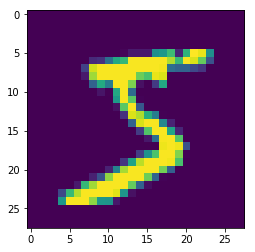

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

(X_pred, _), _= mnist.load_data()
reshape_pred = X_pred.reshape(60000, 784).astype("float32")
reshape_pred /= 255.
plt.imshow(X_pred[0])

In [21]:
preds = relu_model.predict(reshape_pred)
for ind, val in enumerate(preds[0]):
    print("Likelihood for {}: {}%".format(ind, str(val * 100)[:5]))
print("Prediction: {}".format(np.argmax(preds[0])))
print("Certainty: {:.2%}".format(np.max(preds[0])))

Likelihood for 0: 0.261%
Likelihood for 1: 0.002%
Likelihood for 2: 0.342%
Likelihood for 3: 14.65%
Likelihood for 4: 0.000%
Likelihood for 5: 84.57%
Likelihood for 6: 0.001%
Likelihood for 7: 0.037%
Likelihood for 8: 0.084%
Likelihood for 9: 0.038%
Prediction: 5
Certainty: 84.58%


<center><h2>Takeaways: SoftMax</h2></center>

Great! Our network works, and we can easily interpret the results from the SoftMax. Our classifier was 85.57% sure that the image in question is a 5.  Interestingly enough, the network was also 13% sure that it could also be a 3.  When we look at the image, it's easy to see how this sloppy 5 could possibly also be seen as a 3.  

<center><h1>Bringing It All Together</h1></center>

Let's recap what we've learned so far:

<strong>1. For classification, every neuron in a neural network needs an **_Activation Function_**.</strong>
<br>
**2. The neuron calculates the weighted sum of its inputs, and then passes this sum to the activation function.**
<br>
**3. In a Feed-Forward Neural Network, the output of the activation function is the input for neurons in the next layer.  **

**_Challenge:_** Below, you'll find a list of the 4 activation functions explained in this notebook.  Below each activation function, provide a brief explanation of how it works.  Be sure to include what each is used for!


<center><h3>Sigmoid</h3></center>
**_Description:_**
<p>A sigmoid function can be used as a common activation function for any typical layer in a neural network. This is a simple but effective way to introduce non-linearity into our model.</p>

<center><h3>Tanh</h3></center>
**_Description:_**
<p>The tanh function is generally superior to the sigmoid function for training neural networks. There are two main reasons for this: Stronger gradients, which allow for more efficient back propagation.
(Normalized) Data will be centered around 0 with a tanh activation function. This is important, since the output of this layer will be the input of the next layer. This helps prevent internal covariate shift--where each successive layer starts slightly biasing in a continuing direction (for intuition on this, take a look at what 0 outputs on a sigmoid function, and then use that as your input.</p>

<center><h3>reLU</h3></center>
**_Description:_**
<p>ReLU(Rectified Linear Unit) For tasks such as computer vision, the discovery of the reLU activation function was revolutionary. Although it's highly effective, it's also easy to understand--reLU works by returning 0 for any for any z-values less than 0, and the value for anything greater than or equal to 0. </p>
<center><h3>SoftMax</h3></center>
**_Description:_**
<p>This function is special in that it is primarily only ever used for the output layer in a neural network. Much like the sigmoid activation function, SoftMax outputs probabilities between 0 and 1.</p>